In [2]:
# Взял датасет на 30000 строк из kaggle.com
# В датасете представлена информация по изделиям женского нижнего белья из интернет магазина amazon.com
# Перед тем как приступить к анализу, сделал необходимую очитску даных(удалил пустые строки и разные ошибки, привел типы)
# Информация о ценах, типе белья, его цвете, названии, брендах, рейтингах среди покупателей
# Постарался анализировать и представить в графическом виде эту информацию и сделать выводы о разных зависимостях(например как цена влияет на рейтинг)
# 
#

In [ ]:
#подключение необходимых библиотек
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
from ludwig.utils import data_utils
import seaborn as sn
from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams

In [ ]:
#чтение датасета
data = pd.read_csv('innerwear_3.csv', sep=',')

In [3]:
#количество строк и столбцов
data.shape

(31612, 14)

In [4]:
#названия категорий
data.isnull().sum()

product_name        0
mrp                 0
price               0
pdp_url             0
brand_name          0
product_category    0
retailer            0
description         0
rating              0
review_count        0
style_attributes    0
total_sizes         0
available_size      0
color               0
dtype: int64

In [5]:
#удаление ячеек содержащих NaN
data=data.fillna(" ")

In [6]:
#замена знака доллара перед ценой, чтобы привести к integer
data['price']=data['price'].replace('\$','',regex=True).astype(float)


In [34]:
#сохранение в датафрейм
data.to_csv('innerwear_3.csv', index=False)

In [9]:
#названия брендов
data['brand_name'].unique()

array(['Calvin-Klein', 'Wacoal', 'Hanky-Panky', 'b-temptd',
       'Victorias-Secret', 's',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila', 'Lucky-Brand',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal',
       'Creative-Motion', 'Sexy-Hair', 'Nintendo', 'Compression-Comfort'],
      dtype=object)

In [10]:
data['brand_name']=data['brand_name'].replace('s','xxx',regex=True).astype('string')

In [11]:
data = data.dropna()

In [12]:
#удаление строки по индексу
data.drop(5732)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,$36.00,32.40,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,$27.00,27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,$65.00,65.00,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black
3,Hanky Panky Womens Signature Lace Retro V-Kini,$36.00,36.00,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
4,Wacoal Women's Red Carpet Strapless Bra,$65.00,65.00,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,Wacoal Women's Red Carpet Strapless Bra,$65.00,65.00,https://www.amazon.com/-/dp/B01CEBGODE?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,806,"[ 91% Nylon, 9% Spandex , Imported , Hand Wash...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
31608,Wacoal Women's Underwire Sport Bra,$65.00,54.50,https://www.amazon.com/-/dp/B01GTNW0TA?th=1&psc=1,Wacoal,Bras,Amazon US,"Sport bra offers great control, support and co...",4.3,1846,"[ 80% Nylon/ 20% Spandex/Elastane , Imported ,...","32C , 32D , 32DD , 32DDD , 32G , 32H , 34C , 3...","32C , 32D , 32DD , 32G , 32H , 34C , 34D , 34D...",Teaberry/Gray
31609,Wacoal Women's Retro Chic Underwire Bra,$60.00,60.00,https://www.amazon.com/-/dp/B01N6KT7XE?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful low plunge chantilly lace bra with s...,4.4,753,"[ Lace: 100% Nylon; Back: 82% Nylon, 18% Spand...","30B , 30D , 32B , 32C , 32D , 32DD , 32DDD , 3...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...",Violet Tulip
31610,Wacoal Women's Halo Underwire Bra,$48.00,48.00,https://www.amazon.com/-/dp/B00SJ6UBTC?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful all over cross-dye soft lace cups an...,4.4,379,"[ 82% Nylon, 18% Spandex , Imported , Hook and...","32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...","32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...",Ivory


In [13]:
#показ строк с указанным названием ячейки
display(data[(data['brand_name']=='ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d')])

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color


In [14]:
#количество изделий по брендам
data[["brand_name", "price"]]
a = data['brand_name'].value_counts().head()
a

Wacoal                20088
Calvin-Klein           7372
b-temptd               3490
Hanky-Panky             582
Victoriaxxx-Secret       67
Name: brand_name, dtype: Int64

In [15]:
#топ-3 популярных брендов
print('Всего', data['brand_name'].nunique(), 'брендов')
print ('Трое самых популярных:')
data['brand_name'].value_counts()[:3] 


Всего 15 брендов
Трое самых популярных:


Wacoal          20088
Calvin-Klein     7372
b-temptd         3490
Name: brand_name, dtype: Int64

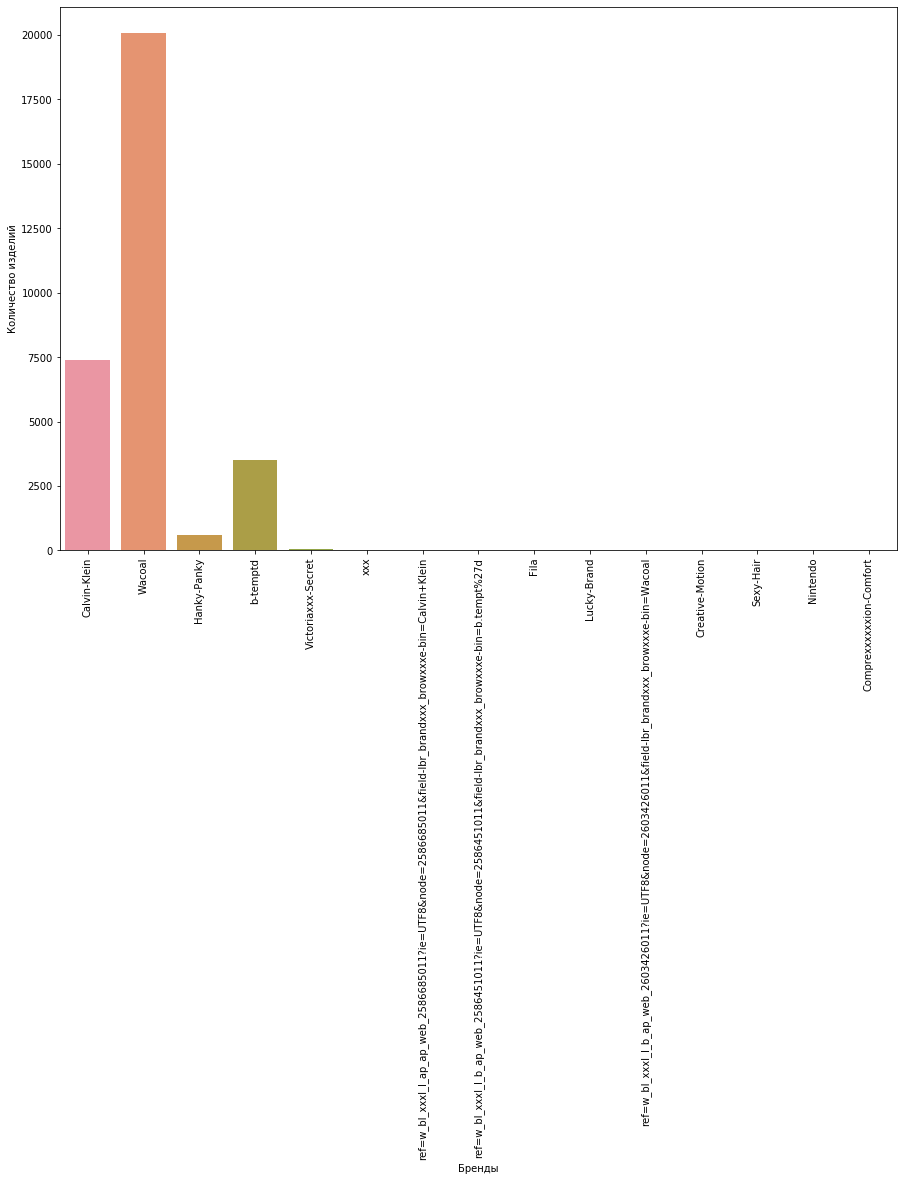

In [48]:
#Количество изделий по брендам
plt.figure(figsize=(15,10))
p = sn.countplot(data['brand_name'])
plt.xlabel('Бренды')
plt.ylabel('Количество изделий')
p1 = plt.setp(p.get_xticklabels(), rotation=90)

In [17]:
#Средняя цена по брендам
average=data.groupby('brand_name')['price'].mean().sort_values(ascending=False)
print("Средняя цена:\n",average)

Средняя цена:
 brand_name
Comprexxxxxxion-Comfort                                                                                      68.000000
Sexy-Hair                                                                                                    54.870000
Wacoal                                                                                                       52.140828
ref=w_bl_xxxl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brandxxx_browxxxe-bin=Wacoal           46.000000
Victoriaxxx-Secret                                                                                           40.402537
ref=w_bl_xxxl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brandxxx_browxxxe-bin=b.tempt%27d      37.980000
ref=w_bl_xxxl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brandxxx_browxxxe-bin=Calvin+Klein    33.540000
xxx                                                                                                          32.650000
Hanky-Panky           

In [20]:
#цвет изделий
data['color'].value_counts()

Black                                            5664
Naturally Nude                                   2825
Ivory                                            1778
White                                            1480
Cappuccino                                       1168
                                                 ... 
Peacoat/Polka Dot Accent                            1
Stippled Skin Print                                 1
Lotus Gypset                                        1
Hyacinth                                            1
White/Evocative Red/Simple Stripe Fresh Taupe       1
Name: color, Length: 260, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

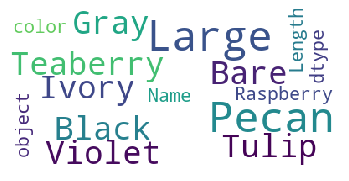

In [26]:
#показывает количество цветов по изделиям
para_docs=(data['color'].astype('str'))
oc_cloud= WordCloud(background_color='white',stopwords= STOPWORDS, max_words=100,max_font_size=50,random_state=1).generate(str(para_docs))
plt.imshow(oc_cloud)
plt.axis('off')

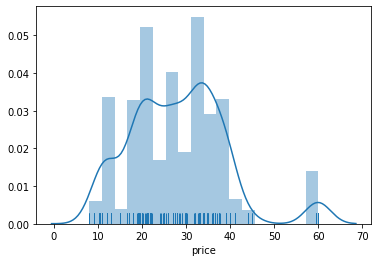

In [27]:
#распределния цвета от цены изделия
sn.distplot(data[data['color'] =='Large']['price'], rug=True)

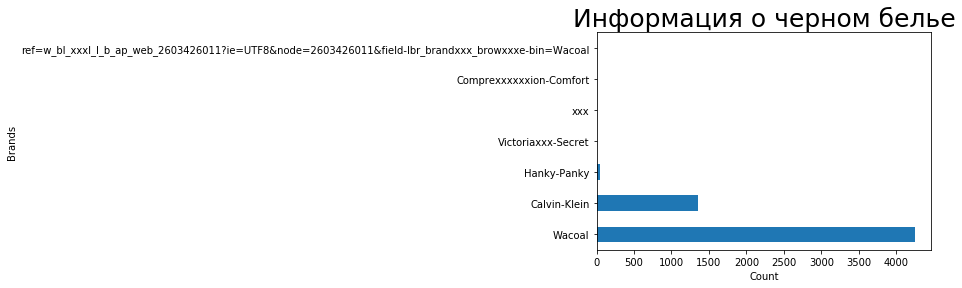

In [33]:
#топ брендов, которые используют черный цвет
Black= data[data['color'] =="Black"]
Black['brand_name'].value_counts()[:10].plot(kind='barh')
plt.title('Информация о черном белье', fontsize = 25)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Brands', fontsize = 10)
plt.show()

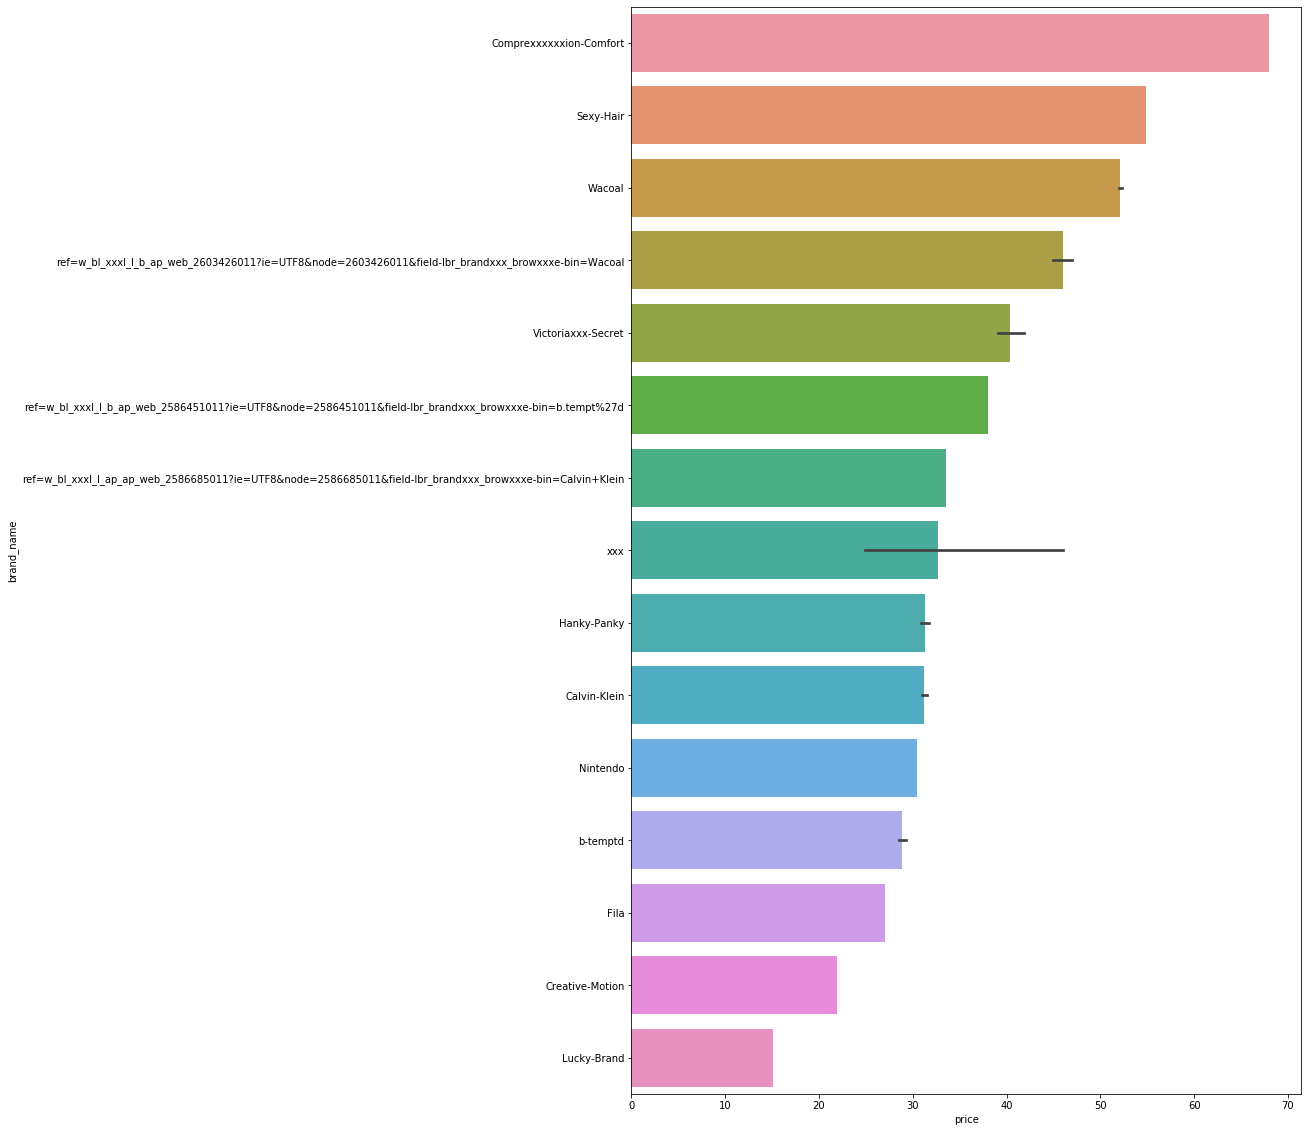

In [37]:
#зависимость цены от бренда
top50 = list(data.groupby('brand_name')['price'].mean().sort_values(ascending=False).head(50).index)
df50 = data.loc[data['brand_name'].isin(top50)]
plt.figure(figsize=(12,20))
sn.barplot(y='brand_name', x='price', data=df50, order=top50)

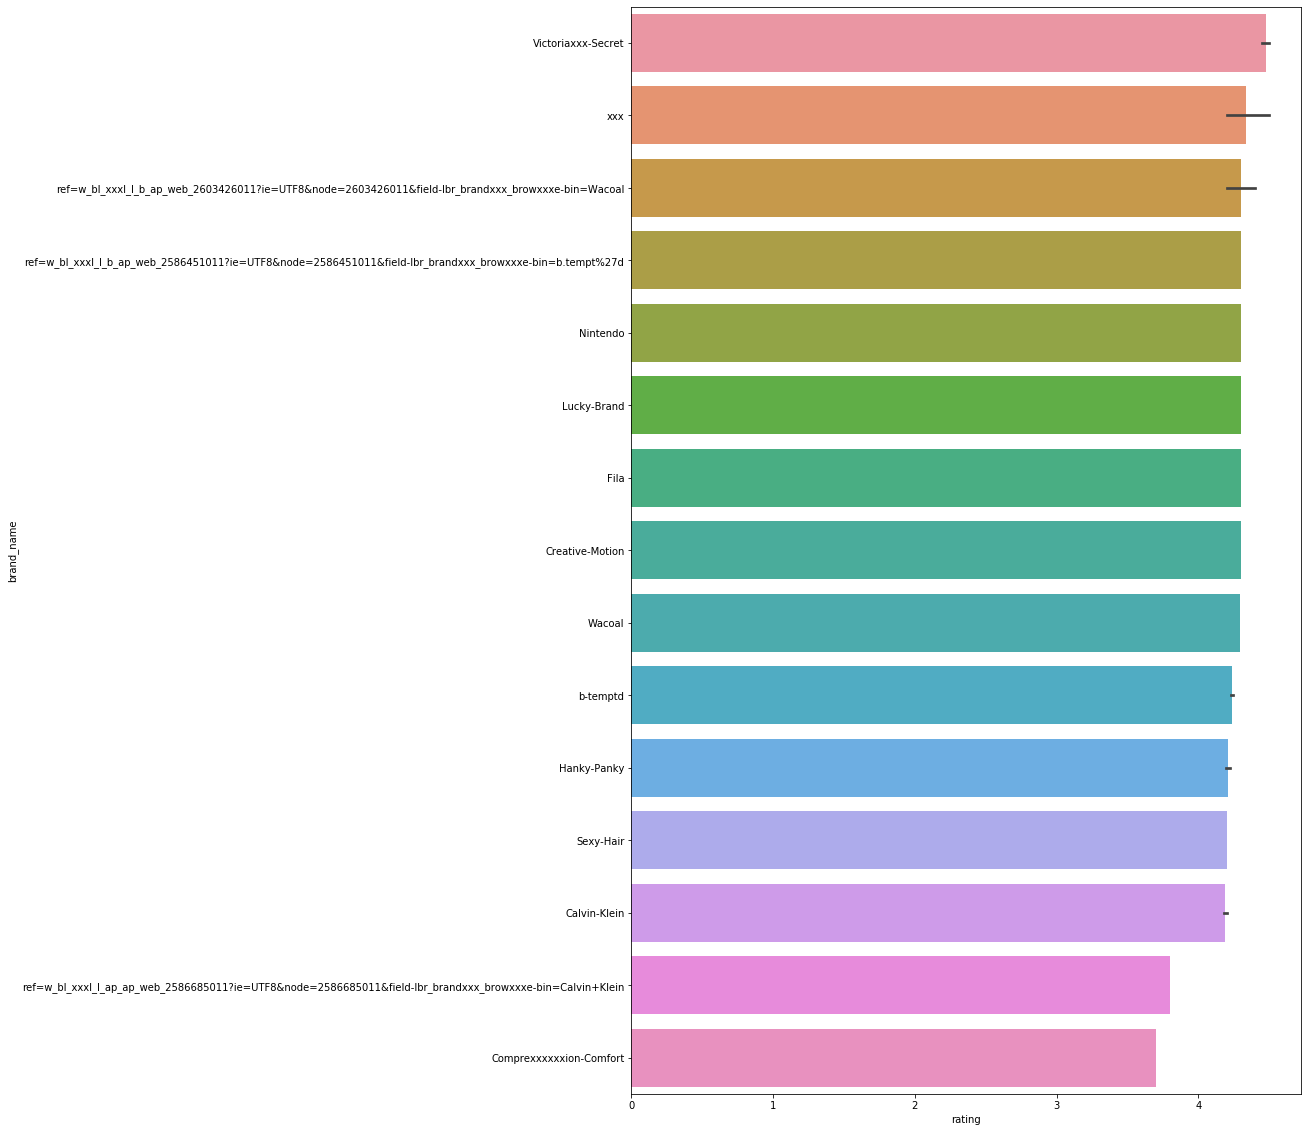

In [39]:
#зависимость рейтинга от бренда
top50 = list(data.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(50).index)
df50 = data.loc[data['brand_name'].isin(top50)]
plt.figure(figsize=(12,20))
sn.barplot(y='brand_name', x='rating', data=df50, order=top50)

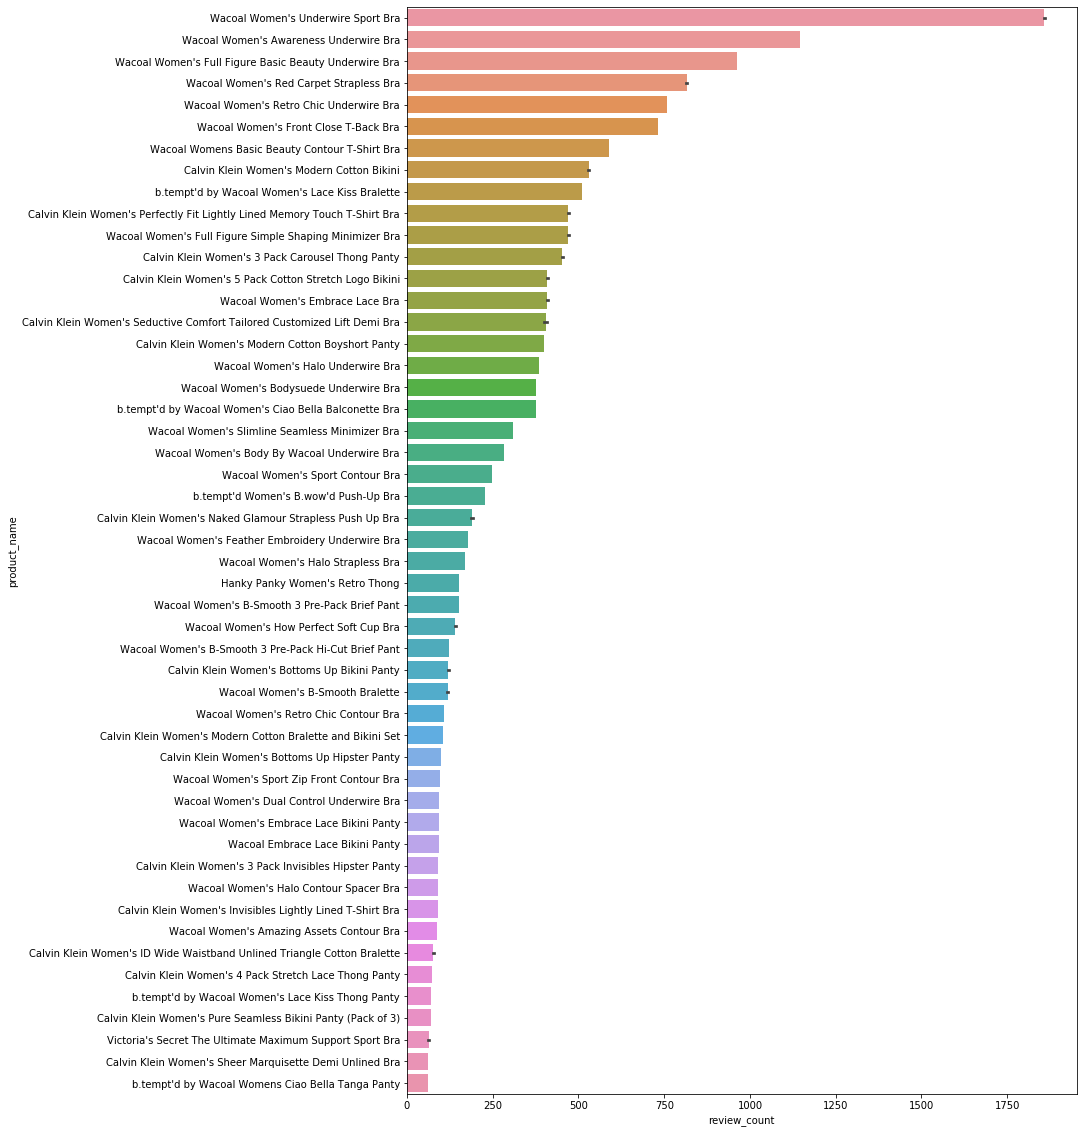

In [46]:
#количество отзывов на изделие
top50 = list(data.groupby('product_name')['review_count'].mean().sort_values(ascending=False).head(50).index)
df50 = data.loc[data['product_name'].isin(top50)]
plt.figure(figsize=(12,20))
sn.barplot(y='product_name', x='review_count', data=df50, order=top50)

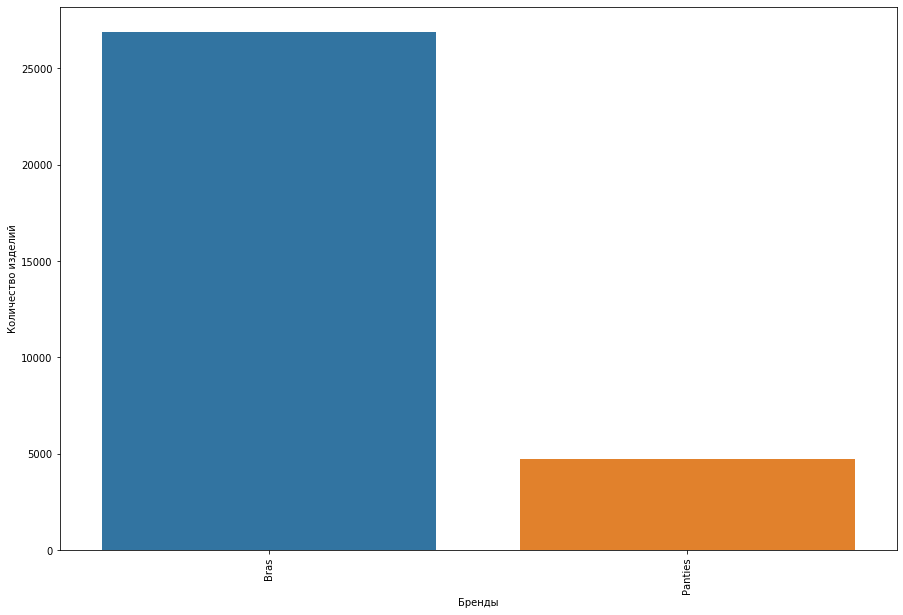

In [52]:
#трусики и лифчики
plt.figure(figsize=(15,10))
p = sn.countplot(data['product_category'])
plt.xlabel('Бренды')
plt.ylabel('Количество изделий')
p1 = plt.setp(p.get_xticklabels(), rotation=90)